# EECS 491 Assigment 3
## Randolph Zhao

## Exercise 1. MRFs and Images Denoising (40 points)

### 1.1

Assume $x_p$ changes its state to $-x_p$, 
\begin{align} 
h\sum_ix_i \quad\text{becomes}\quad &h\sum_ix_i-2hx_p \\
-\beta\sum_i\sum_{j\in ne(i)}{x_ix_j} \quad\text{becomes}\quad &-\beta\sum_i\sum_{j\in ne(i)}{x_ix_j}+2\beta\sum_{i\in ne(p)}x_ix_p+2\beta\sum_{j\in ne(p)}x_px_j \\
&=-\beta\sum_i\sum_{j\in ne(i)}{x_ix_j}+4\beta\sum_{i\in ne(p)}x_ix_p \\
-\eta\sum_ix_iy_i \quad\text{becomes}\quad &-\eta\sum_ix_iy_i+2x_py_p \\
\end{align}

Thus, the change is
$$\Delta E= -2hx_p+4\beta\sum_{j \in ne(i)}x_px_j+2\eta x_py_p$$

### 1.2

Explanation of the code:

We will track the difference of energy after each loop of the whole graph and stop the denoise when difference is smaller than 0.01. For each loop of pixel in the graph, we will try to minimize the energy by trying flip the pixels. For each pixel in the graph, we will compare the energy of graph with flipped pixel and without flipped pixel. If the energy of flipped one is smaller, we will flip the pixel.

So, we should expect that in one loop of pixel in the graph, it converges. And to make sure it converge on the whole graph, we will do another loop of graph to check whether there is still large difference in energy.

In [1]:
# denoising...

def calc_energy(x, y, h, b, n):
    sum1 = 0   # \sum {x_i}
    sum2 = 0   # \sum {x_i * x_j}
    sum3 = 0   # \sum {x_i * y_i}
    row_num, col_num = x.shape
    for row in range(row_num):
        for col in range(col_num):
            sum1 += x[row][col]
            temp = 0
            temp = temp + x[row-1][col] if row>0 else temp
            temp = temp + x[row+1][col] if row<row_num-1 else temp
            temp = temp + x[row][col-1] if col>0 else temp
            temp = temp + x[row][col+1] if col<col_num-1 else temp
            sum2 += x[row][col] * temp
            sum3 += x[row][col] * y[row][col]
            
    return h * sum1 - b * sum2 - n * sum3


def denoise(corrupted_image, h, b, n):
    denoised_image = corrupted_image.copy()
    row_num, col_num = denoised_image.shape
    diff = 1
    current = last = calc_energy(denoised_image, denoised_image, h, b, n)
    while diff > 0.01:
        for row in range(row_num):
            for col in range(col_num):
                flipped_image = denoised_image.copy()
                flipped_image[row][col] *= -1
                new_energy = calc_energy(flipped_image, denoised_image, h, b, n)
                if new_energy < current:
                    denoised_image[row][col] *= -1
                    current = new_energy
        diff = abs(last - current)
        last = current
    return denoised_image

(-0.5, 19.5, 19.5, -0.5)

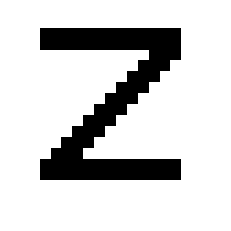

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

# import a graph of letter 'Z' and translate to binary graph with 20*20 pixels
image = Image.open('pixil-frame-0 (5).png')
bigraph = np.array(image).astype(int)[:,:,3]
row_num, col_num = bigraph.shape
for row in range(row_num):
    for col in range(col_num):
        bigraph[row][col] = -1 if bigraph[row][col]==255 else 1
plt.imshow(bigraph, cmap=cm.gray)
plt.axis('off')

(-0.5, 19.5, 19.5, -0.5)

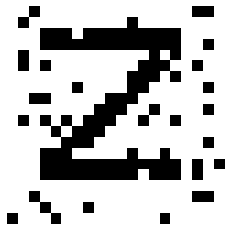

In [3]:
# create corrupted image
import random
np.random.seed(1000)

def corrupt_image(image, prob):
    corrupted_image = image.copy()
    row_num, col_num = corrupted_image.shape
    for row in range(row_num):
        for col in range(col_num):
            if np.random.binomial(1, prob)==1:
                corrupted_image[row][col] *= -1
    return corrupted_image

corrupted_image= corrupt_image(bigraph, 0.1)
plt.imshow(corrupted_image, cmap=cm.gray)
plt.axis('off')

### 1.3

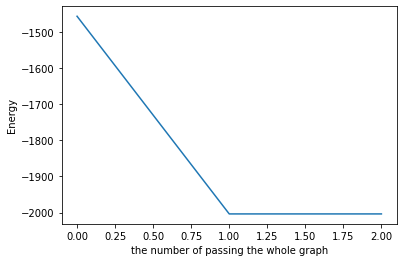

In [4]:
# plot the energy of each loop of graph
def plot_energy_graph(corrupted_image, h, b, n):
    denoised_image = corrupted_image.copy()
    row_num, col_num = denoised_image.shape
    diff = 1
    current = last = calc_energy(denoised_image, denoised_image, h, b, n)
    energy = []
    energy.append(current)
    while diff > 0.01:
        for row in range(row_num):
            for col in range(col_num):
                flipped_image = denoised_image.copy()
                flipped_image[row][col] *= -1
                new_energy = calc_energy(flipped_image, denoised_image, h, b, n)
                if new_energy < current:
                    denoised_image[row][col] *= -1
                    current = new_energy
        diff = abs(last - current)
        last = current
        energy.append(current)
    plt.plot(list(range(len(energy))), energy)
    plt.xlabel('the number of passing the whole graph')
    plt.ylabel('Energy')
    plt.show()

plot_energy_graph(corrupted_image, 0, 1, 2.1)

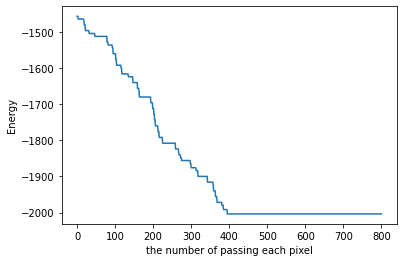

In [5]:
# plot the energy of each loop of pixel
def plot_energy_pixel(corrupted_image, h, b, n):
    denoised_image = corrupted_image.copy()
    row_num, col_num = denoised_image.shape
    diff = 1
    current = last = calc_energy(denoised_image, denoised_image, h, b, n)
    energy = []
    energy.append(current)
    while diff > 0.01:
        for row in range(row_num):
            for col in range(col_num):
                flipped_image = denoised_image.copy()
                flipped_image[row][col] *= -1
                new_energy = calc_energy(flipped_image, denoised_image, h, b, n)
                if new_energy < current:
                    denoised_image[row][col] *= -1
                    current = new_energy
                energy.append(current)
        diff = abs(last - current)
        last = current
    plt.plot(list(range(len(energy))), energy)
    plt.xlabel('the number of passing each pixel')
    plt.ylabel('Energy')
    plt.show()

plot_energy_pixel(corrupted_image, 0, 1, 2.1)

### 1.4

In [6]:
# revised for iteration number controlling
def print_denoise(corrupted_image, h, b, n, itr_limit):
    denoised_image = corrupted_image.copy()
    row_num, col_num = denoised_image.shape
    diff = 1
    energy = calc_energy(denoised_image, denoised_image, h, b, n)
    itr = 0
    while diff > 0.01:
        for row in range(row_num):
            for col in range(col_num):
                if itr >= itr_limit:
                    plt.imshow(denoised_image, cmap=cm.gray)
                    plt.axis('off')
                    return
                flipped_image = denoised_image.copy()
                flipped_image[row][col] *= -1
                if calc_energy(flipped_image, denoised_image, h, b, n) < \
                calc_energy(denoised_image, denoised_image, h, b, n):
                    denoised_image[row][col] *= -1
                itr += 1
        new_energy = calc_energy(denoised_image, denoised_image, h, b, n)
        diff = abs(energy - new_energy)
        energy = new_energy
    plt.imshow(denoised_image, cmap=cm.gray)
    plt.axis('off')
    plt.show()

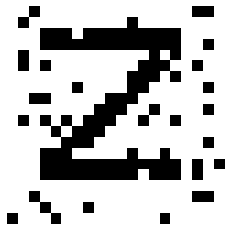

In [7]:
# at the start before updating
print_denoise(corrupted_image, 0, 1, 2.1, 0)

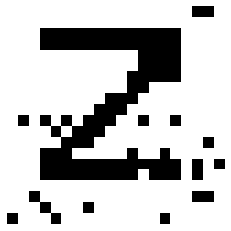

In [8]:
# when it is about 50% converged in the pixels
print_denoise(corrupted_image, 0, 1, 2.1, 200)

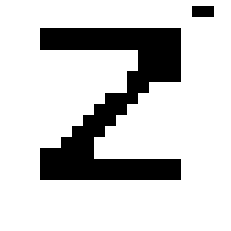

In [9]:
# at the end when it converges in the pixels
print_denoise(corrupted_image, 0, 1, 2.1, 400)

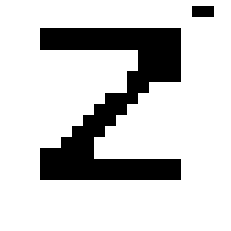

In [10]:
# at the end when it converges in the graph
print_denoise(corrupted_image, 0, 1, 2.1, 801)

### 1.5

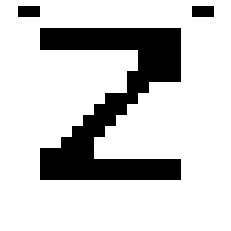

In [11]:
print_denoise(corrupted_image, 1, 1, 2.1, 801)

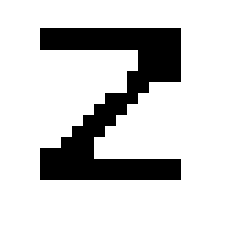

In [12]:
print_denoise(corrupted_image, -1, 1, 2.1, 801)

For the first experiment, we set $h=1/-1$ instead of $h=0$. h=0 means that the prior probability of two states are equal, which is basically no prior information. If we put h=1, it basically means the prior of positive pixel is higher, which here is black pixels, so it will keep a little more black pixels. If h=-1, it basically means prior knowledge is that white pixels should be more, which will reduce black pixels a little more.

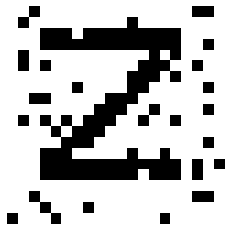

In [13]:
print_denoise(corrupted_image, 0, 0, 2.1, 801)

For the second experiment, we set $\beta=0$ instead of $\beta=1$, which will effectively remove the links between neighbouring pixels. In this case, the prior of two states are equal and we do not care about the relationship of surrounding pixels. In other words, we do not use the information of homogouous regions but just pixels itself, which cannot clean any noise at all. Just as result shows, it is the same as noisy image.

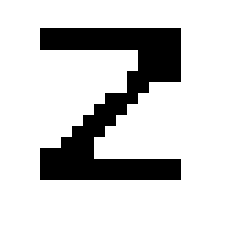

In [14]:
print_denoise(corrupted_image, 0, 1, 0, 801)

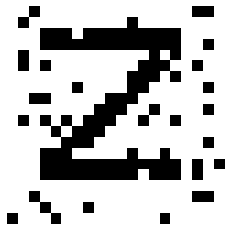

In [15]:
print_denoise(corrupted_image, 0, 1, 10000, 801)

For the third experiment, we set $\eta=0,\eta=10000$ instead of $\eta=2.1$. When $\eta=0$ which means we do not care the relationship between the pixel with two different states, the only information we use here is the information of neighboring pixels. Actually, this only information is enough for our denoising in this simple image. As result shows, it still successfully denoise the noise. However, when $\eta=10000$ which means we want to keep the pixel unflipped as much as possible, it will just keep the noisy image and do not change anything.

### 1.6

The largest problem I observed in the previous MRF energy equation is that it can be only used on binary image. So, I try to generalize the equation so that it can deal with multi-valued MRF in a gray image, which can be further extended to RGB images. So, the equation I thought of is
$$E(x,y)=h\sum_i{x_i}+\beta\sum_i\sum_{j\in ne(i)}{abs(x_i-x_j)}+\eta\sum_i{abs(x_i-y_i)}$$
, where the second term is sum of difference between the pixel and its neighbors and the third term is the sum of difference between the flipped color and the original color. When minimizing the energy, for the second term we are minimizing the color difference in a small clique. For the third term, we are trying to keep most of pixels stable since the noise in most cases are less than normal pixels. While implementing this equation, it is better to first standardize or normalize the image pixels so that the color difference will be much unifrom.

In the experiment of this new equation, I found that the previous MRF equation has another problem: struggle when there is a sudden gap between a pixel and its neighbor. For example, in the following image, the black outer boundary is suddenly changed from gray to black and black to white on outer or inner side. Since the old equation only treat top/down/left/right as neighbors, in properties with arc, such as circle, the equation cannot provide a smooth boundary. Thus, we update the definition of neighbors in our new equation: top/down/left/right/top left/top right/down left/down right, totally 8 surrounding pixels are all its neighbors. By doing so, we could have a more smooth boundary than the old one.

Thus, our final equation is 
$$E(x,y)=h\sum_i{x_i}+\beta\sum_i\sum_{j\in surrounding(i)}{abs(x_i-x_j)}+\eta\sum_i{abs(x_i-y_i)}$$
with $\beta>0$. With this equation, we can not only solve multi-gray-scale images but also have a more smooth boundary.

Explanation of the denoising algorithm and code:

We will first get all colors in the image as the all possible colors a pixel can flip to. Then, for each pixel, we flip to one of all possible color and calculate the energy according to our new equation. Then, we will update the image by flipping the pixel to the color with smallest energy.

(-0.5, 49.5, 49.5, -0.5)

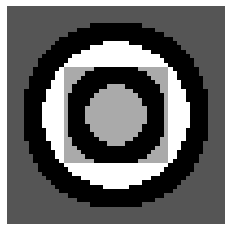

In [16]:
import numpy as np 
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# import a graph with four colors (4 different gray scale levels), 50*50 pixels
image = cv.imread("pixil-frame-0 (9).png", 0)
img_double = np.array(image, dtype=np.float64)

# standardization by pixel color
row_num, col_num = img_double.shape
colors = sorted(list(set(img_double.flat)))
for row in range(row_num):
    for col in range(col_num):
        img_double[row][col] = colors.index(img_double[row][col])

plt.imshow(img_double, cmap=cm.gray)
plt.axis('off')

In [17]:
sorted(list(set(img_double.flat)))

[0.0, 1.0, 2.0, 3.0]

(-0.5, 49.5, 49.5, -0.5)

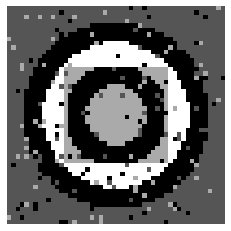

In [18]:
# corrupt the image
import random
colors = list(set(img_double.flat))

def corrupt_image(image, prob):
    np.random.seed(12345)
    corrupted_image = image.copy()
    row_num, col_num = corrupted_image.shape
    for row in range(row_num):
        for col in range(col_num):
            if np.random.binomial(1, prob)==1:
                corrupted_image[row][col] = colors[np.random.randint(0, len(colors)-1)]
    return corrupted_image

corrupted_image= corrupt_image(img_double, 0.1)
plt.imshow(corrupted_image, cmap=cm.gray)
plt.axis('off')

In [19]:
# calculate with new equation but only calculate neighbor as top/down/left/right

def calc_energy_multi_rough(x, y, h, b, n):
    sum1 = 0   # \sum {x_i}
    sum2 = 0   # \sum {x_i * x_j}
    sum3 = 0   # \sum {x_i * y_i}
    row_num, col_num = x.shape
    for row in range(row_num):
        for col in range(col_num):
            sum1 += x[row][col]
            # sum up the difference between the pixel and its 9 neighbors
            temp = 0
            temp = temp + abs(x[row-1][col]-x[row][col]) if row>0 else temp
            temp = temp + abs(x[row+1][col]-x[row][col]) if row<row_num-1 else temp
            temp = temp + abs(x[row][col-1]-x[row][col]) if col>0 else temp
            temp = temp + abs(x[row][col+1]-x[row][col]) if col<col_num-1 else temp
            sum2 += temp
            sum3 += abs(x[row][col]-y[row][col])
            
    return h * sum1 + b * sum2 + n * sum3

def print_denoise_multi_rough(corrupted_image, h, b, n, itr_limit):
    # get the all colors that a pixel can be flipped to 
    colors = list(set(corrupted_image.flat))
    denoised_image = corrupted_image.copy()
    row_num, col_num = denoised_image.shape
    energy = calc_energy_multi_rough(denoised_image, denoised_image, h, b, n)
    itr = 0
    while True:
        for row in range(row_num):
            for col in range(col_num):
                if itr >= itr_limit:
                    plt.imshow(denoised_image, cmap=cm.gray)
                    plt.axis('off')
                    return
                min_color = 0
                min_energy = energy
                # flip to each possible color and compare the energy
                for color in colors:
                    flipped_image = denoised_image.copy()
                    flipped_image[row][col] = color
                    temp = calc_energy_multi_rough(flipped_image, denoised_image, h, b, n)
                    if temp < min_energy:
                        min_energy = temp
                        min_color = color
                if min_energy < energy:
                    denoised_image[row][col] = min_color
                    energy = min_energy
                itr += 1
    plt.imshow(denoised_image, cmap=cm.gray)
    plt.axis('off')
    plt.show()

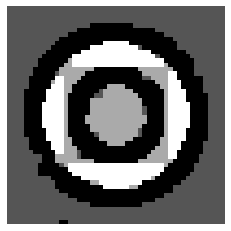

In [20]:
print_denoise_multi_rough(corrupted_image, 0, 1, 2.1, 2500)

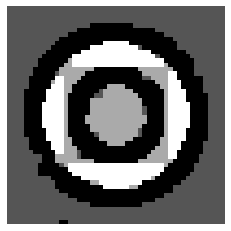

In [21]:
print_denoise_multi_rough(corrupted_image, 0, 1, 2.1, 5000)

We can see that if we only use four neighbor pixels, the boundary will pretty rough, but still works fine with four colors.

In [22]:
# calculate with new equation and calculate neighbor as all 8 surrounding pixels
def calc_energy_multi(x, y, h, b, n):
    sum1 = 0   # \sum {x_i}
    sum2 = 0   # \sum {x_i * x_j}
    sum3 = 0   # \sum {x_i * y_i}
    row_num, col_num = x.shape
    for row in range(row_num):
        for col in range(col_num):
            sum1 += x[row][col]
            # sum up the difference between the pixel and its 9 neighbors
            temp = 0
            temp = temp + abs(x[row-1][col]-x[row][col]) if row>0 else temp
            temp = temp + abs(x[row+1][col]-x[row][col]) if row<row_num-1 else temp
            temp = temp + abs(x[row][col-1]-x[row][col]) if col>0 else temp
            temp = temp + abs(x[row][col+1]-x[row][col]) if col<col_num-1 else temp
            temp = temp + abs(x[row-1][col-1]-x[row][col]) if row>0 and col>0 else temp
            temp = temp + abs(x[row-1][col+1]-x[row][col]) if row>0 and col<col_num-1 else temp
            temp = temp + abs(x[row+1][col-1]-x[row][col]) if row<row_num-1 and col>0 else temp
            temp = temp + abs(x[row+1][col+1]-x[row][col]) if row<row_num-1 and col<col_num-1 else temp
            sum2 += temp
            sum3 += abs(x[row][col]-y[row][col])
            
    return h * sum1 + b * sum2 + n * sum3

def print_denoise_multi(corrupted_image, h, b, n, itr_limit):
    # get the all colors that a pixel can be flipped to 
    colors = list(set(corrupted_image.flat))
    denoised_image = corrupted_image.copy()
    row_num, col_num = denoised_image.shape
    energy = calc_energy_multi(denoised_image, denoised_image, h, b, n)
    itr = 0
    while True:
        for row in range(row_num):
            for col in range(col_num):
                if itr >= itr_limit:
                    plt.imshow(denoised_image, cmap=cm.gray)
                    plt.axis('off')
                    return
                min_color = 0
                min_energy = energy
                # flip to each possible color and compare the energy
                for color in colors:
                    flipped_image = denoised_image.copy()
                    flipped_image[row][col] = color
                    temp = calc_energy_multi(flipped_image, denoised_image, h, b, n)
                    if temp < min_energy:
                        min_energy = temp
                        min_color = color
                if min_energy < energy:
                    denoised_image[row][col] = min_color
                    energy = min_energy
                itr += 1
    plt.imshow(denoised_image, cmap=cm.gray)
    plt.axis('off')
    plt.show()

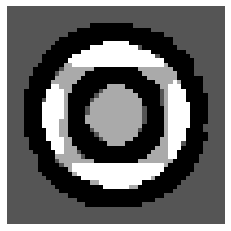

In [23]:
print_denoise_multi(corrupted_image, 0, 1, 2.1, 2500)

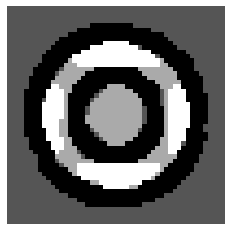

In [24]:
print_denoise_multi(corrupted_image, 0, 1, 2.1, 5000)

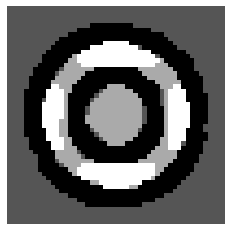

In [25]:
print_denoise_multi(corrupted_image, 0, 1, 2.1, 7500)

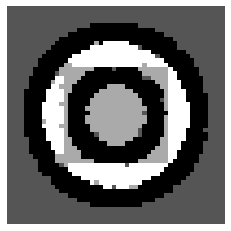

In [26]:
print_denoise_multi(corrupted_image, 0, 1, 5, 5000)

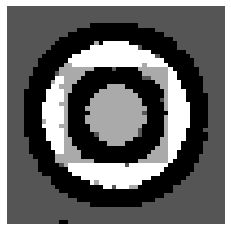

In [32]:
print_denoise_multi(corrupted_image, 0, 1, 7, 5000)

By using 8 surrounding pixels as neighbors, we can see the boundaries of both inner and outer circles are more smooth in the first pass of the whole image. However, while considering the colors of more neighbors, if there is something unclear details, such as the inner square, the model may be misled and make worse results by the increase of iteration. However, we can increase the $\eta$ to keep more pixels unflipped, as the last two denoised images show, which both have smooth boundary but also keep the square clear.

In conclusion, this experiment shows that our generalize equation can be used on multi-gray-scale images with better boundary recoginization.

## Exercise 2. Graphical Representation (15 points)

### 2.1

The corresponding Markov Random Field is 
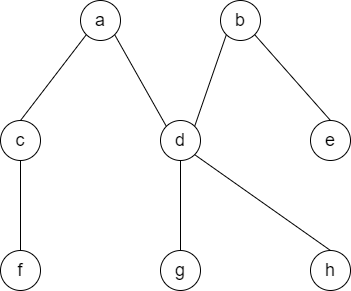
with the pontential functions
\begin{align} 
p(a,b,c,d,e,f,g,h)=\psi(a,c)\psi(a,b,d)\psi(b,e)\psi(c,f)\psi(d,g)\psi(d,h) \\
\end{align}
, which is
\begin{align} 
p(a,b,c,d,e,f,g,h)=p(a)p(c|a)p(f|c)p(b)p(e|b)p(d|a,b)p(g|d)p(h|d) \\
\end{align}
in terms of the Bayes net.

### 2.2
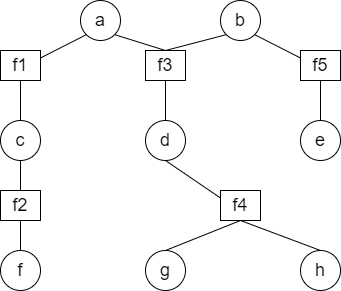
The joint probability is
\begin{align} 
p(a,b,c,d,e,f,g,h)=\psi(a,c)\psi(c,f)\psi(a,b,d)\psi(d,g)\psi(d,h)\psi(b,e) \\
\end{align}

### 2.3

Factor Graph 1:
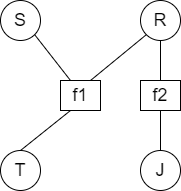

Factors:
\begin{align} 
f_1(S,R,T)&=p(T|S,R)p(S)p(R) \\
f_2(R,J)&=p(J|R) \\
\end{align}

Joint Proability:
\begin{align} 
p(S,T,R,J)=f_{1}{(S,R,T)}f_{2}{(R,J)}=p(T|S,R)p(S)p(R)p(J|R) \\ 
\end{align}

Factor Graph 2:
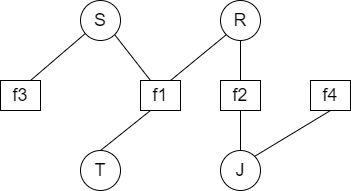

Factors:
\begin{align} 
f_1(S,R,T)&=p(T|S,R) \\
f_2(R,J)&=p(R|J) \\
f_3(S)&=p(S) \\
f_4(J)&=p(J) \\
\end{align}

Joint Proability:
\begin{align} 
p(S,T,R,J)=f_1(S,R,T)f_2(R,J)f_3(S)f_4(J)=p(T|S,R)p(R|J)p(S)p(J) \\ 
\end{align}

## Exercise 3. The Sum Product Algorithm (20 pts)

### 3.1
The first set of message:
\begin{align} 
\mu_{a\rightarrow f_1}&=1 \\ 
\mu_{b\rightarrow f_1}&=1 \\ 
\mu_{f_1\rightarrow c}(c)&=\sum_a\sum_b{f_1(a,b,c)\mu_{a\rightarrow f_1}\mu_{b\rightarrow f1}} \\ 
\mu_{c\rightarrow f_2}&=\mu_{f_1\rightarrow c}(c) \\
\mu_{f_2\rightarrow d}(d)&=\sum_c{f_2(c,d)\mu_{c\rightarrow f_2}} \\ 
\end{align}

The second set of message:
\begin{align} 
\mu_{d\rightarrow f_2}&=1 \\ 
\mu_{f_2\rightarrow c}(c)&=\sum_d{f_2(c,d)\mu_{d\rightarrow f_2}} \\ 
\mu_{c\rightarrow f_1}&=\mu_{f_2\rightarrow c}(c) \\
\mu_{f_1\rightarrow a}(a)&=\sum_b\sum_c{f_1(a,b,c)\mu_{c\rightarrow f_1}\mu_{b\rightarrow f_1}} \\
\mu_{f_1\rightarrow b}(b)&=\sum_a\sum_c{f_1(a,b,c)\mu_{c\rightarrow f_1}\mu_{a\rightarrow f_1}} \\
\end{align}

### 3.2
\begin{align} 
p(c)&=\mu_{f_1\rightarrow c}\mu_{f_2\rightarrow c} \\
&=\sum_a\sum_b{f_1(a,b,c)\mu_{a\rightarrow f_1}\mu_{b\rightarrow f1}}\sum_d{f_2(c,d)\mu_{d\rightarrow f_2}} \\
&=\sum_a\sum_b{f_1(a,b,c)}\sum_d{f_2(c,d)} \\
\end{align}

### 3.3
From the definition of marginal probaility, we have
\begin{align} 
p(c)&=\sum_a\sum_b\sum_d{p(a,b,c,d)} \\
&=\sum_a\sum_b\sum_d{f_1(a,b,c)f_2(c,d)} \\
&=\sum_a\sum_bf_1(a,b,c)\sum_d{f_2(c,d)} \\
&=\sum_a\sum_b{f_1(a,b,c)}\sum_d{f_2(c,d)} \\
\end{align}
Thus, the expression of 3.2 is verified.

### 3.4

No, the sum-product algorithm has good performance on cycle-free graphs, but may not give the correct answer on the graph with cycles. For example, let's try to calculate the marginal probability $p(c)$.
Note that for now,
\begin{align} 
\mu_{a\rightarrow f_1}&=1 \\ 
\mu_{d\rightarrow f_2}&=1 \\
\mu_{b\rightarrow f_1}&=\mu_{f_2\rightarrow b} \\ 
\mu_{b\rightarrow f_2}&=\mu_{f_1\rightarrow b} \\ 
\mu_{f_1\rightarrow b}&=\sum_a\sum_c{f_1(a,b,c)\mu_{a\rightarrow f_1}\mu_{c\rightarrow f_1}} \\
\mu_{f_2\rightarrow b}&=\sum_c\sum_d{f_2(b,c,d)\mu_{c\rightarrow f_2}\mu_{d\rightarrow f_2}} \\
\mu_{f_1\rightarrow c}&=\sum_a\sum_b{f_1(a,b,c)\mu_{a\rightarrow f_1}\mu_{b\rightarrow f_1}} \\ 
\mu_{f_2\rightarrow c}&=\sum_b\sum_d{f_2(b,c,d)\mu_{d\rightarrow f_2}\mu_{b\rightarrow f_2}} \\
\end{align}

Thus, we have
\begin{align} 
p(c)&=\mu_{f_1\rightarrow c} \cdot \mu_{f_2\rightarrow c} \\
&=\sum_a\sum_b{f_1(a,b,c)\mu_{a\rightarrow f_1}\mu_{b\rightarrow f1}} \cdot \sum_b\sum_d{f_2(b,c,d)\mu_{d\rightarrow f_2}\mu_{b\rightarrow f_2}} \\
&=\sum_a\sum_b{f_1(a,b,c)\sum_c\sum_d{f_2(b,c,d)\mu_{c\rightarrow f_2}\mu_{d\rightarrow f_2}}} \\
& \quad\quad\quad\quad\cdot \sum_b\sum_d{f_2(b,c,d)\sum_a\sum_c{f_1(a,b,c)\mu_{a\rightarrow f_1}\mu_{c\rightarrow f_1}}} \\
&=\sum_a\sum_bf_1(a,b,c)\sum_c\sum_df_2(b,c,d)\mu_{f_1\rightarrow c} \\
& \quad\quad\quad\quad\cdot \sum_b\sum_df_2(b,c,d)\sum_a\sum_cf_1(a,b,c)\mu_{f_2\rightarrow c}\\
\end{align}
We can see that the equation has been in an infinite loop that never cannot get the clear result. Thus, it proves the sum-product algorithm does not work well under the graph with cycles.

## Exploration (20 points)

Since the Markov Random Field (MRF) can be used as image denoising, I would explore further how it can be applied to graphs. I found that we can combine Markov Random Field and Naive Bayes to segment the images. We can easily see that image segmentation is a pixel labeling task.

The reason we want to use MRF to model image segmentation is
1. In images, neighboring pixels often have similar properties which MRF can capture.
2. Well studied with strong theoretical background.
3. Can further use MCMC sampling of the underlying structure

Assume we have an image $S$ with pixels $s_{ij}$ with corresponding ${x_{1,1},...,x_{m,n}}$ represents the gray scale here. For p lables, we have $y_1,...,y_p$ lables. According to Naive Bayes, we have 
$$p(y|x)=\frac{p(x|y)p(y)}{p(x)}$$.
Thus, we want to calculate $p(x|y)p(y)$.

For the prior $p(y)$, this is where MRF is used for. According to Hammersley-Clifford Theorem, a random field is a MRF if and only if $p(y)$ follows a Gibbs distributioin, where we have
$$p(y)=\frac{1}{Z}exp(-U(y))=\frac{1}{Z}exp(-\sum_{c}{V_c(y)})$$, where $V_c(y)$ is called trhe clique potential.

For the likelihood $p(x|y)$, we can treat pixels as Gaussian distributions with 
$$p(x|y)=\frac{1}{\sqrt{2\pi \sigma_y}}exp(-\frac{(x-\mu_y)^2}{2\sigma_{y}^{2}})$$.

The Clique potentials are defined in two ways:
1. singleton: proportional to the likelihood
2. Doubleton: smoothness prior, $V_c(i,j)=\beta \delta(y_i,y_j)=\begin{cases}
        -beta \quad\text{if}\quad w_i=w_j \\
        beta \quad\text{if}\quad w_i\neq w_j \\
        \end{cases}$. As $\beta$ increases, it means regions become more homogenous.

Thus, we have our energy function as:
$$U(y)=\sum_s(log(\sqrt{2\pi \sigma_y})+\frac{(x-\mu_y)^2}{2\sigma_{y}^{2}})+\sum_{s,r}\beta \sigma(y_s,y_r)$$

We can use this energy function to implement image segmentation. Recall that we have $p(y)=\frac{1}{Z}exp(-U(y))=\frac{1}{Z}exp(-\sum_{c}{V_c(y)})$. We can use MAP to segment images since $MAP(y)=argmax\, p(y|x)=argmin\, U(y)$.

In this exploration, we will use another simplest way to implement image segmentation with MRF. We will not use this energy function to find best labels but follow the main idea of Naive Bayes, i.e. we try to maximize $p(x|y)p(y)$ where $p(x|y)$ is still $p(x|y)=\frac{1}{\sqrt{2\pi \sigma_y}}exp(-\frac{(x-\mu_y)^2}{2\sigma_{y}^{2}})$. But we will not calculate as the Gibbs original equation but simplify it as calculating the number of same labels of surrounding pixels, i.e. $p(y)=\sum_{i\in ne(j)} {\delta(i,j)}$, where i is the pixel surrounding the required pixel j. In this algorithm, the calculation is divided into two parts and we think each part has its only energy. So, we are still optimizing the energy function, which can be represented as $$segmented\; image=argmin(U_1(y,S)+U_2(y))$$

In the following algorithm, we will use ICM to implement it. Just like EM algorithm, I will first give a random label for each pixel and iteratively optimize each label. For each iteration, we will first calculate the $p(y)$ by calculating the number of same labels of surrounding pixels. Then, calculate the $p(x|y)$ by Gaussian distribution. Then, we will take the largest product of likelihood and prior and update the label by largest product.

(-0.5, 416.5, 463.5, -0.5)

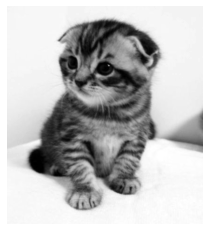

In [1]:
import numpy as np 
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.cm as cm

image = cv.imread("cat.jpg", 0)
img_double = np.array(image, dtype=np.float64)
plt.imshow(img_double, cmap=cm.gray)
plt.axis('off')

In [2]:
import numpy as np 
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import warnings
warnings.filterwarnings("ignore")

def image_segmentation(path, label_num, max_itr=100):
    # read image and translate into binary array
    image = cv.imread(path, 0)
    img_double = np.array(image, dtype=np.float64)
    np.random.seed(10)
    labeled_image = np.random.randint(1, label_num + 1, size=img_double.shape)
    row_num, col_num = labeled_image.shape
    ones = np.ones((row_num, col_num))
    for _ in range(max_itr):
        # calculate prior
        p_y = np.zeros((label_num, row_num, col_num))

        for i in range(label_num):
            label = (i + 1) * np.ones((row_num, col_num))
            surrounding_same_label_num = 0
            for j in range(9):
                if j == 4: # the center
                    continue
                loc = np.zeros((9,))
                loc[j] = 1
                surrounding_label = cv.filter2D(np.array(labeled_image,\
                                        dtype=np.uint8),-1, loc.reshape(3,3))
                surrounding_same_label_num += \
                1 * np.logical_not(label - surrounding_label)
            p_y[i:] = (1.0/8) * surrounding_same_label_num
        p_y[p_y == 0] = 0.001 # avoid zero

        # calculate likelihood
        p_x_given_y = np.zeros((label_num, row_num, col_num))

        mu = np.zeros((1, label_num))
        sigma = np.zeros((1, label_num))
        for i in range(1, label_num+1):
            data = image[np.where(labeled_image==i)]
            mu[0, i-1] = np.mean(data)
            sigma[0, i-1] = np.var(data)
        for i in range(label_num):
            MU = mu[0, i] * ones
            p_x_given_y[i, :] = (1.0 / np.sqrt(2 * np.pi * sigma[0, i])) \
            * np.exp(-1. * ((image - MU) ** 2) / (2 * sigma[0, i]))

        # use log to avoid the case that probability is too small
        prob = np.log(p_y) + np.log(p_x_given_y)

        temp = prob.reshape(label_num, row_num*col_num).T
        best_label = np.argmax(temp, axis=1)
        best_label = best_label + np.ones(best_label.shape)  
        labeled_image = best_label.reshape(row_num, col_num) 

    return labeled_image

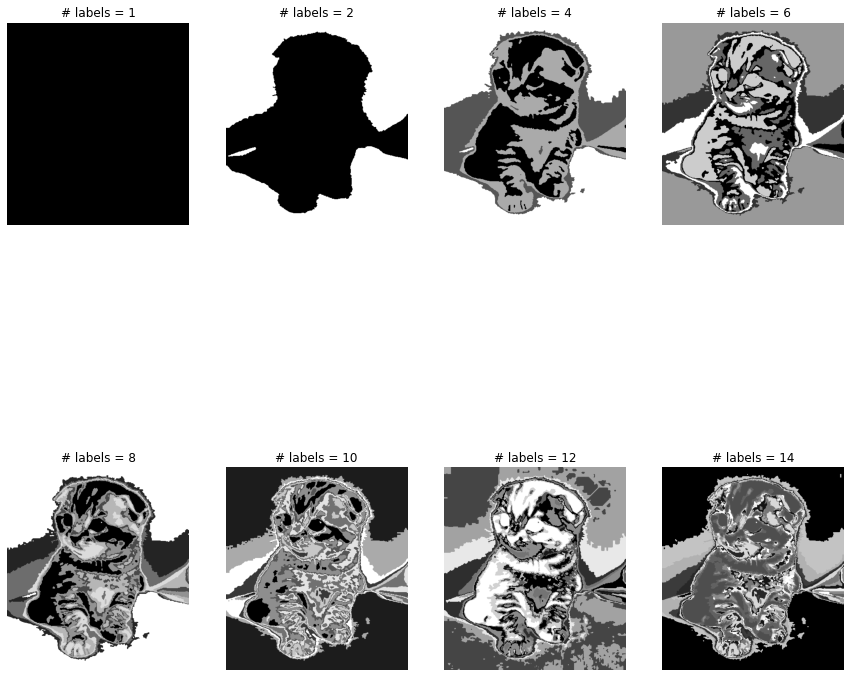

In [3]:
labels = [1, 2, 4, 6, 8, 10, 12, 14]
plt.figure(figsize=(15,15))
for i in range(len(labels)):
    plt.subplot(2, 4, i+1)
    plt.title(f'# labels = {labels[i]}')
    plt.imshow(image_segmentation("cat.jpg", labels[i]), cmap=cm.gray)
    plt.axis('off')
plt.show()

From the above image segmentation results, we can find some interesting facts. With more labels, the segmentation model can learn more details. The most significant is when the number of labels is 8, which makes the image segmentation catchs lots of details in the raw graph. Compared with the model with only 2 labels, the model with 8 labels can catch details in the background and detailed strips on the cat. However, the result shows having as many labels as possible does not mean that this model will have better performance. Just as the result shows, if labels are above 8, the model focus on some over-detailed information and got misled, where I believe is 'overfitting'. Recall that this algorithm is a simplified image segmentation with MRF and it still has many places that we can improve. 

First, we can improve the first-time labeling. Now, we use randomly produced labels for the image. If we can use some algorithms, such as k-means, to quickly produce a relatively 'good' estimate k-means, I believe it can not only reduce training/converge time, but also will improve the performace. The latter guess is based on that although both k-means and randomly produced will give local maximum, the local maximum of k-means may be better than randomly produced. Another idea is that when there are many labels, the dimension will be higher, which means there're more local maximum. In this case, k-means can avoid some worst cases (e.g. start from the minimum, which randomly produced could meet) and help the model find a higher local maximum.

Second, we could try to optimize the complete energy function with Doubleton clique potentials. Introducing Doubleton clique potentials could help the model better find the homogeous locations. When solving the energy function, we could use simulated annealing to better approximate global maximum.